## Upper Confidence Bound

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# load dataset
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
# implement the UCB
# N is the number of rounds, d is the amount of ads
# ads_selected is the count of adds clicked
# number of selections is a list of 10 zeros
# sum of rewards is a list of 10 zeros
# total_rewards is the total rewards

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

# 1st for loop is the average reward of add "i" up to round "n"
# 2nd for loop calculates the confidence interval at round "n"
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

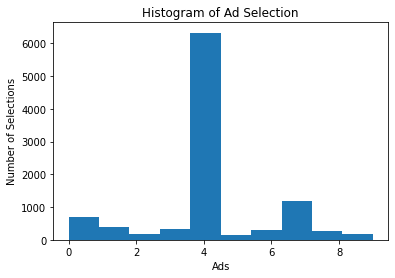

In [4]:
# visualise the result using a histogram
plt.hist(ads_selected)
plt.title("Histogram of Ad Selection")
plt.xlabel("Ads")
plt.ylabel("Number of Selections")
plt.show()